In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, concatenate
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [2]:
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

In [ ]:
import cv2
from scipy.ndimage import gaussian_filter

def extract_prnu(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found: {image_path}")
    img = img.astype(np.float32) / 255.0
    smooth = gaussian_filter(img, sigma=1)
    noise = img - smooth
    return noise


In [ ]:
def prnu_features(noise):
    flat = noise.flatten()
    return np.array([
        np.mean(flat),
        np.std(flat),
        np.max(flat),
        np.min(flat),
        np.median(flat)
    ])


In [6]:
def convert_to_ela_image_and_prnu(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)
    
    ela_image = ImageChops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    ela_image = ela_image.resize((128, 128))
    ela_array = np.array(ela_image) / 255.0
    prnu_noise = extract_prnu(path)
    prnu_vec = prnu_features(prnu_noise)  
    return ela_array,prnu_vec

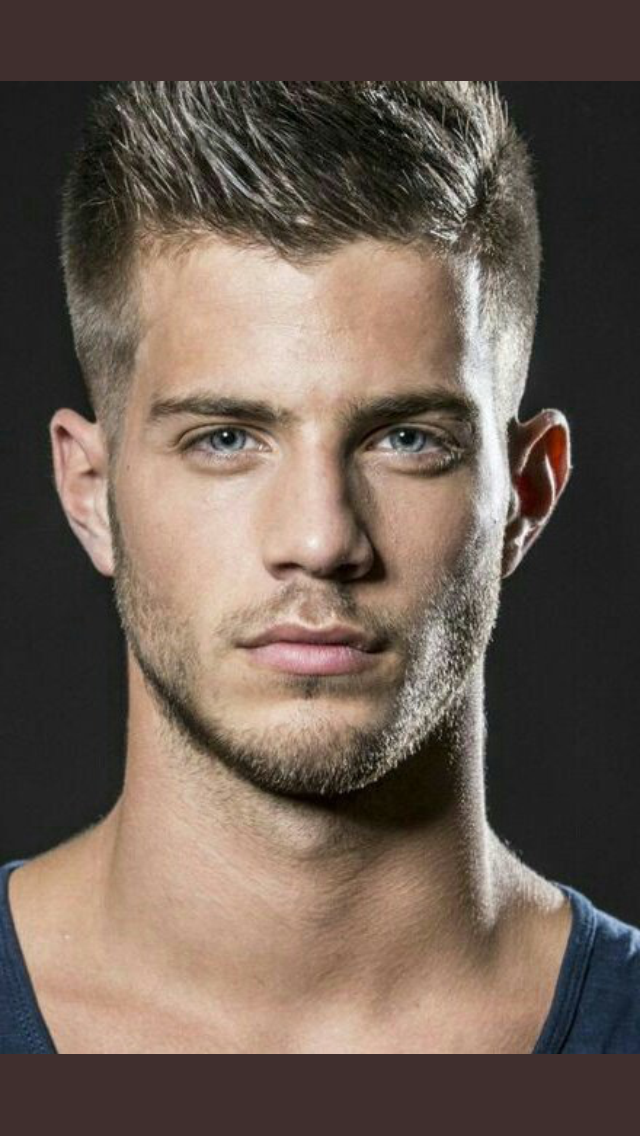

In [7]:
real_image_path = r'CASIA2\real\1 (11).png'
Image.open(real_image_path)

In [8]:
convert_to_ela_image_and_prnu(real_image_path, 90)

(array([[[0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882353],
         ...,
         [0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882353]],
 
        [[0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882353],
         ...,
         [0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882353]],
 
        [[0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882353],
         ...,
         [0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882353]],
 
        ...,
 
        [[0.05882353, 0.        , 0.05882353],
         [0.05882353, 0.        , 0.05882

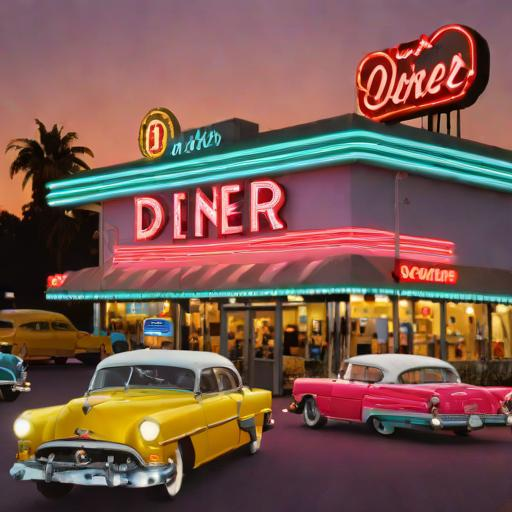

In [9]:
fake_image_path = r'CASIA2\fake\1image_repeat1_prompt14.jpg'
Image.open(fake_image_path)

In [10]:
convert_to_ela_image_and_prnu(fake_image_path, 90)

(array([[[0.00784314, 0.00784314, 0.01960784],
         [0.00784314, 0.00784314, 0.02352941],
         [0.        , 0.        , 0.02745098],
         ...,
         [0.        , 0.01568627, 0.03137255],
         [0.        , 0.01568627, 0.03137255],
         [0.        , 0.01568627, 0.03137255]],
 
        [[0.        , 0.        , 0.00784314],
         [0.        , 0.        , 0.00784314],
         [0.        , 0.        , 0.00784314],
         ...,
         [0.03137255, 0.02352941, 0.01568627],
         [0.03137255, 0.02352941, 0.01568627],
         [0.03137255, 0.02352941, 0.01568627]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.01176471, 0.00784314, 0.        ],
         [0.01176471, 0.00784314, 0.        ],
         [0.01176471, 0.00784314, 0.        ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

In [11]:
image_size = (128, 128)

In [12]:
def prepare_image_and_prnu(image_path):
    ela_img, prnu_vec = convert_to_ela_image_and_prnu(image_path, 90)
    return ela_img, prnu_vec

In [13]:
X_ela = []   
X_prnu = []  
Y = []     

In [14]:
real_path = r'C:\Users\anish\OneDrive\Desktop\MyCodes\AI IMAGE DETECTION SYSTEM\CASIA2\real'
for dirname, _, filenames in os.walk(real_path):
    for filename in filenames:
        if filename.lower().endswith(('jpg', 'jpeg', 'png')):
            full_path = os.path.join(dirname, filename)
            try:
                ela_img, prnu_vec = prepare_image_and_prnu(full_path)
                X_ela.append(ela_img)
                X_prnu.append(prnu_vec)
                Y.append(1)
                if len(Y) % 500 == 0:
                    print(f'Processed {len(Y)} real images')
            except:
                print(f"Error processing: {full_path}")

c:\Users\anish\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Processed 500 real images
Processed 1000 real images
Processed 1500 real images
Processed 2000 real images
Processed 2500 real images
Processed 3000 real images
Processed 3500 real images
Processed 4000 real images
Processed 4500 real images
Processed 5000 real images
Processed 5500 real images
Processed 6000 real images
Processed 6500 real images
Processed 7000 real images
Processed 7500 real images
Processed 8000 real images
Processed 8500 real images
Processed 9000 real images
Processed 9500 real images
Processed 10000 real images


In [15]:
fake_path = r'C:\Users\anish\OneDrive\Desktop\MyCodes\AI IMAGE DETECTION SYSTEM\CASIA2\fake'
for dirname, _, filenames in os.walk(fake_path):
    for filename in filenames:
        if filename.lower().endswith(('jpg', 'jpeg', 'png')):
            full_path = os.path.join(dirname, filename)
            try:
                ela_img, prnu_vec = prepare_image_and_prnu(full_path)
                X_ela.append(ela_img)
                X_prnu.append(prnu_vec)
                Y.append(0)
                if len(Y) % 500 == 0:
                    print(f'Processed {len(Y)} total images')
            except:
                print(f"Error processing: {full_path}")

Processed 10500 total images
Processed 11000 total images
Processed 11500 total images
Processed 12000 total images
Processed 12500 total images
Processed 13000 total images
Processed 13500 total images
Processed 14000 total images
Processed 14500 total images
Processed 15000 total images
Processed 15500 total images
Processed 16000 total images
Processed 16500 total images
Processed 17000 total images
Processed 17500 total images
Processed 18000 total images
Processed 18500 total images
Processed 19000 total images
Processed 19500 total images
Processed 20000 total images


In [16]:
X_ela = np.array(X_ela)                        
X_prnu = np.array(X_prnu)                   
Y = to_categorical(Y, 2)                       


In [17]:
X_ela_train, X_ela_val, X_prnu_train, X_prnu_val, Y_train, Y_val = train_test_split(
    X_ela, X_prnu, Y, test_size=0.2, random_state=5
)

print("Training samples:", len(X_ela_train))
print("Validation samples:", len(X_ela_val))

Training samples: 16188
Validation samples: 4048


In [18]:
from keras.models import Model
def build_combined_model():
    input_ela = Input(shape=(128, 128, 3), name='ela_input')
    x = Conv2D(32, (5, 5), padding='valid', activation='relu')(input_ela)
    x = Conv2D(32, (5, 5), padding='valid', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    input_prnu = Input(shape=(5,), name='prnu_input')
    y = Dense(32, activation='relu')(input_prnu)
    y = Dropout(0.3)(y)

    merged = concatenate([x, y])
    z = Dense(128, activation='relu')(merged)
    z = Dropout(0.4)(z)
    output = Dense(2, activation='softmax')(z)

    model = Model(inputs=[input_ela, input_prnu], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [19]:
model = build_combined_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ela_input (InputLayer)         [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 124, 124, 32  2432        ['ela_input[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 120, 120, 32  25632       ['conv2d[0][0]']                 
                                )                                                             

In [20]:
epochs = 20
batch_size = 32

In [21]:
init_lr = 1e-4
optimizer = Adam(lr = init_lr, decay = init_lr/epochs)

c:\Users\anish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0,
                              patience = 2,
                              verbose = 0,
                              mode = 'auto')

In [24]:
hist = model.fit(
    [X_ela_train, X_prnu_train],
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=([X_ela_val, X_prnu_val], Y_val),
    callbacks=[early_stopping]
)


Epoch 1/20
506/506 [==============================] - 628s 1s/step - loss: 0.5070 - accuracy: 0.7359 - val_loss: 0.4164 - val_accuracy: 0.8169
Epoch 2/20
506/506 [==============================] - 634s 1s/step - loss: 0.4092 - accuracy: 0.8140 - val_loss: 0.3697 - val_accuracy: 0.8330
Epoch 3/20
506/506 [==============================] - 629s 1s/step - loss: 0.3511 - accuracy: 0.8452 - val_loss: 0.3127 - val_accuracy: 0.8728
Epoch 4/20
506/506 [==============================] - 629s 1s/step - loss: 0.2737 - accuracy: 0.8916 - val_loss: 0.2380 - val_accuracy: 0.9101
Epoch 5/20
506/506 [==============================] - 621s 1s/step - loss: 0.2208 - accuracy: 0.9167 - val_loss: 0.2064 - val_accuracy: 0.9214
Epoch 6/20
506/506 [==============================] - 2043s 4s/step - loss: 0.1886 - accuracy: 0.9296 - val_loss: 0.2243 - val_accuracy: 0.9180
Epoch 7/20
506/506 [==============================] - 619s 1s/step - loss: 0.1580 - accuracy: 0.9433 - val_loss: 0.1753 - val_accuracy: 0.937

In [25]:
train_loss = hist.history['loss'][-1] *100
val_loss = hist.history['val_loss'][-1]*100
train_accuracy = hist.history['accuracy'][-1] * 100
val_accuracy = hist.history['val_accuracy'][-1] * 100

print(f"Training Loss: {train_loss:.4f}%")
print(f"Validation Loss: {val_loss:.4f}%")
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")

Training Loss: 1.9246%
Validation Loss: 23.2295%
Training Accuracy: 99.44%
Validation Accuracy: 95.01%


In [26]:
model.save('model_AI.h5')

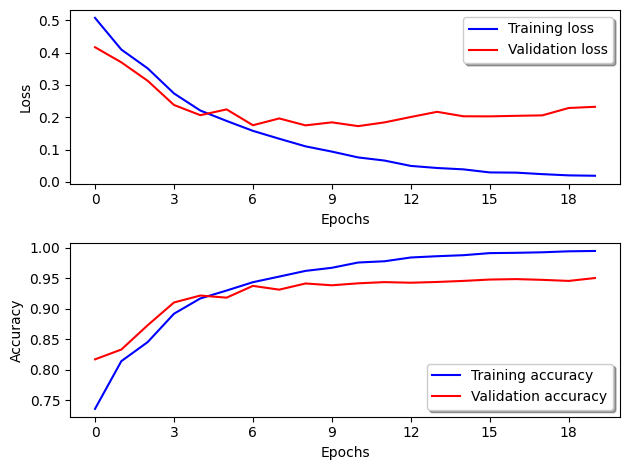

In [27]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
ax[0].plot(hist.history['val_loss'], color='r', label="Validation loss")
ax[0].set_xlabel('Epochs')  
ax[0].set_ylabel('Loss')    
ax[0].legend(loc='best', shadow=True)
ax[1].plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(hist.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].set_xlabel('Epochs')  
ax[1].set_ylabel('Accuracy')  
ax[1].legend(loc='best', shadow=True)
for axis in ax:
    axis.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()  
plt.show()


127/127 [==============================] - 25s 194ms/step


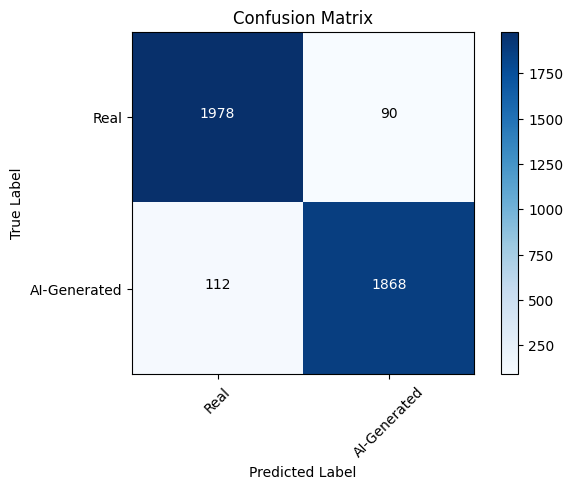

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

# Load trained model
model = load_model('model_AI.h5')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

# Predict using both inputs
Y_pred = model.predict([X_ela_val, X_prnu_val])
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot
plot_confusion_matrix(confusion_mtx, classes=["Real", "AI-Generated"])


127/127 [==============================] - 26s 207ms/step


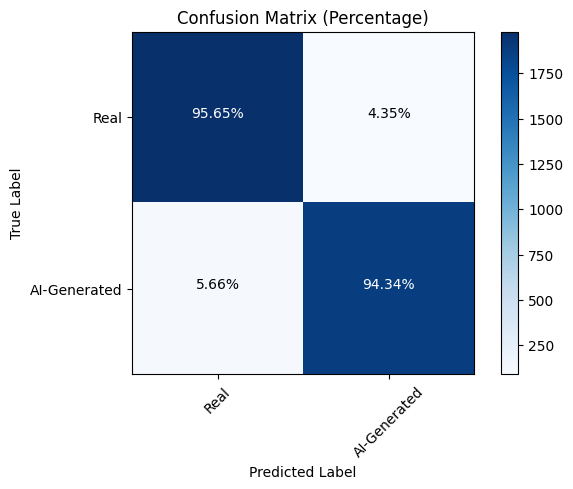

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

model = load_model('model_AI.h5')

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:.2f}%", horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Y_pred = model.predict([X_ela_val, X_prnu_val])
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes=["Real", "AI-Generated"], normalize=True, title='Confusion Matrix (Percentage)')
plt.show()


In [40]:
class_names = ['AI-Generated', 'real']

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image, ImageChops, ImageEnhance
from scipy.ndimage import gaussian_filter
import cv2
import os


model = load_model('model_AI.h5')  # or 'Fake_image_detector.keras'


def extract_prnu(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found: {image_path}")
    img = img.astype(np.float32) / 255.0
    smooth = gaussian_filter(img, sigma=1)
    noise = img - smooth
    return noise

def prnu_features(noise):
    flat = noise.flatten()
    return np.array([
        np.mean(flat),
        np.std(flat),
        np.max(flat),
        np.min(flat),
        np.median(flat)
    ])


def convert_to_ela_image_and_prnu(path, quality=90):
    temp_filename = 'temp_file_name.jpg'
    
    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality=quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    ela_image = ela_image.resize((128, 128))
    ela_array = np.array(ela_image) / 255.0

    prnu_noise = extract_prnu(path)
    prnu_vec = prnu_features(prnu_noise)

    return ela_array, prnu_vec


def prepare_single_image_and_prnu(image_path):
    ela_img, prnu_vec = convert_to_ela_image_and_prnu(image_path)
    ela_img = np.expand_dims(ela_img, axis=0)       # Shape: (1, 128, 128, 3)
    prnu_vec = np.expand_dims(prnu_vec, axis=0)     # Shape: (1, 5)
    return ela_img, prnu_vec

def predict_image(model, image_path):
    ela_input, prnu_input = prepare_single_image_and_prnu(image_path)
    prediction = model.predict([ela_input, prnu_input])
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    label = "Real" if predicted_class == 1 else "AI Generated"
    return label, confidence


image_path = r'C:\Users\anish\OneDrive\Desktop\MyCodes\AI IMAGE DETECTION SYSTEM\CASIA2\fake\1image_repeat1_prompt23.jpg'

label, confidence = predict_image(model, image_path)
print(f"The image is: {label} with {confidence*100:.2f}% confidence.")


1/1 [==============================] - 0s 227ms/step
The image is: AI Generated with 100.00% confidence.
